## Project Description:
The Titanic Problem is based on the sinking of the ‘Unsinkable’ ship Titanic in early 1912. It gives you information about multiple people like their ages, sexes, sibling counts, embarkment points, and whether or not they survived the disaster.

## Objective:

Predict if an arbitrary passenger on Titanic would survive the sinking or not. 

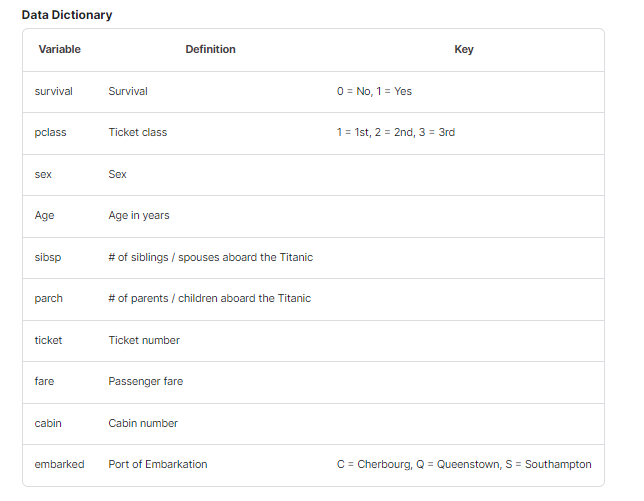

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

## Data Exploration

In [2]:
data=pd.read_csv(r'C:\Users\JPGD\Documents\ANDREA GOMEZ\FLIP ROBO TECHNOLOGIES INTERNSHIP\Projects\Datasets\titanic_train.csv')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
data.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [4]:
# Checking the dimension of the dataset
data.shape

(891, 12)

This dataset contains 891 rows and 12 columns, out of which 1 is target variable ("Survived") and the remaining 11 are independent variables.

In [5]:
# Checking data info (missing values/ data type)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
# Converting the datatype of Survived, Pclass Column from int64 to object
#data['Survived']=data['Survived'].apply(str)
#data['Pclass']=data['Pclass'].apply(str)

In [7]:
# Check data types
data.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [8]:
# Checking the number of unique values in each column

data.nunique().to_frame("No. of unique values")

,No. of unique values
PassengerId,891
Survived,2
Pclass,3
Name,891
Sex,2
Age,88
SibSp,7
Parch,7
Ticket,681
Fare,248


In [9]:
# Checking the value counts of each column
for i in data.columns:
    print(data[i].value_counts())
    print('\n')

1      1
599    1
588    1
589    1
590    1
      ..
301    1
302    1
303    1
304    1
891    1
Name: PassengerId, Length: 891, dtype: int64


0    549
1    342
Name: Survived, dtype: int64


3    491
1    216
2    184
Name: Pclass, dtype: int64


Carlsson, Mr. Frans Olof                      1
Vander Cruyssen, Mr. Victor                   1
Reynaldo, Ms. Encarnacion                     1
Bengtsson, Mr. John Viktor                    1
Lester, Mr. James                             1
                                             ..
Masselmani, Mrs. Fatima                       1
Strom, Mrs. Wilhelm (Elna Matilda Persson)    1
Robbins, Mr. Victor                           1
Alexander, Mr. William                        1
Bystrom, Mrs. (Karolina)                      1
Name: Name, Length: 891, dtype: int64


male      577
female    314
Name: Sex, dtype: int64


24.00    30
22.00    27
18.00    26
28.00    25
19.00    25
         ..
55.50     1
74.00     1
0.92      1
70.50     1
12.00  

In [10]:
# Understanding the central tendencies of the numeric data using the .describe() method.
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


From the data description it is possible to see that there are missing values. And in some features the huge difference between the 75% and the max value, could be an indication of outliers in the dataset.

In [11]:
# Check Null Values
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [12]:
# Percentage of missing data per feature

print('The % of missing data in Age feature is',round(data['Age'].isnull().sum()/len(data)*100,2),'%')
print('The % of missing data in Cabin feature is',round(data['Cabin'].isnull().sum()/len(data)*100,2),'%')
print('The % of missing data in Embarked feature is',round(data['Embarked'].isnull().sum()/len(data)*100,2),'%')

The % of missing data in Age feature is 19.87 %
The % of missing data in Cabin feature is 77.1 %
The % of missing data in Embarked feature is 0.22 %


There are three features with missing values. Age 19.87%, Cabin 77.1% and Embarked 0.22%.

<AxesSubplot:>

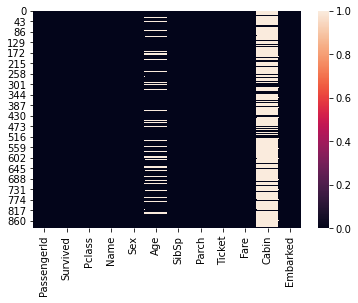

In [13]:
# let's visualize it using heatmap
sns.heatmap(data.isnull())

In [14]:
# Separating Numerical and Categorical columns
# Checking for Categorical Columns

#categorical_data=[]

#for i in data.dtypes.index:
    #if data.dtypes[i]=='object':
        #categorical_data.append(i)
#categorical_data.remove('Name')
#print("Categorical Columns: ",categorical_data)

# Checking for Numerical Columns
#numerical_data=[]

#for i in data.dtypes.index:
    #if data.dtypes[i]!='object':
        #numerical_data.append(i)
#numerical_data.remove('PassengerId')

#print("Numerical Columns: ",numerical_data)


### Data Visualization

In [15]:
categorical_data=data[['Survived','Pclass','Sex','Ticket','Cabin','Embarked']]
numerical_data=data[['Age','SibSp','Parch','Fare']]

In [16]:
#for i in data[numerical_data].columns:
    #plt.hist(data[numerical_data][i])
    #plt.title(i)
    #plt.show()

<AxesSubplot:>

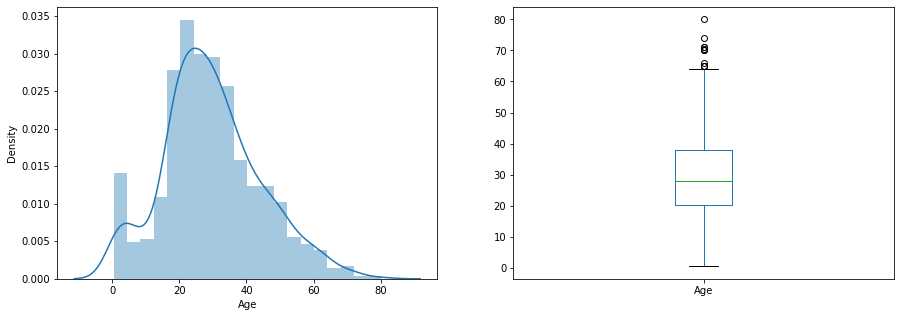

In [17]:
# Checking data distribution and outliers for all numeric variables
plt.figure(2)
plt.subplot(121)
sns.distplot(data['Age'])
plt.subplot(122)
data['Age'].plot.box(figsize=(15,5))

<AxesSubplot:>

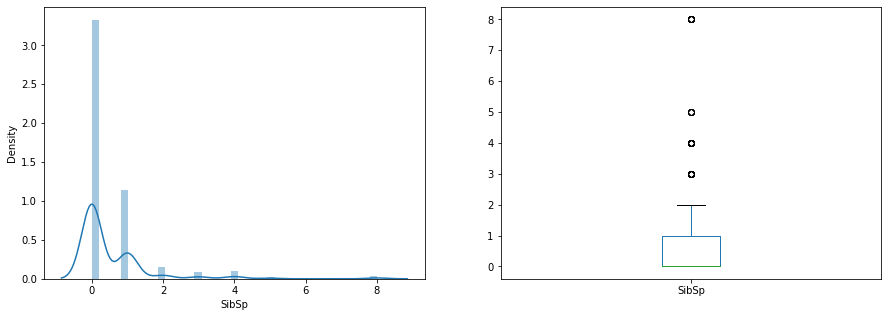

In [18]:
# Checking data distribution and outliers for all numeric variables
plt.figure(2)
plt.subplot(121)
sns.distplot(data['SibSp'])
plt.subplot(122)
data['SibSp'].plot.box(figsize=(15,5))

<AxesSubplot:>

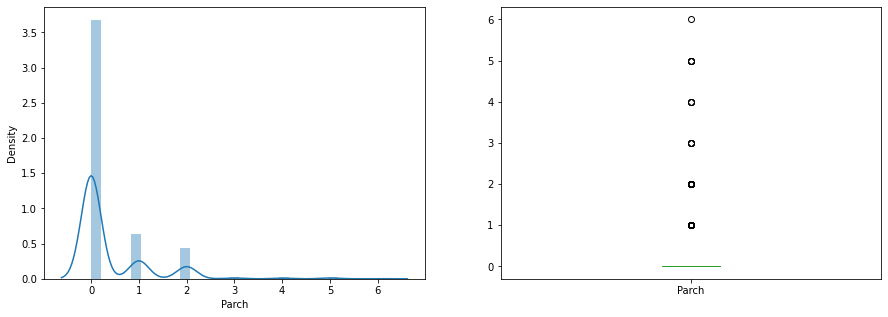

In [19]:
# Checking data distribution and outliers for all numeric variables
plt.figure(2)
plt.subplot(121)
sns.distplot(data['Parch'])
plt.subplot(122)
data['Parch'].plot.box(figsize=(15,5))

Data shows that most of the children travelled only with a nanny.

<AxesSubplot:>

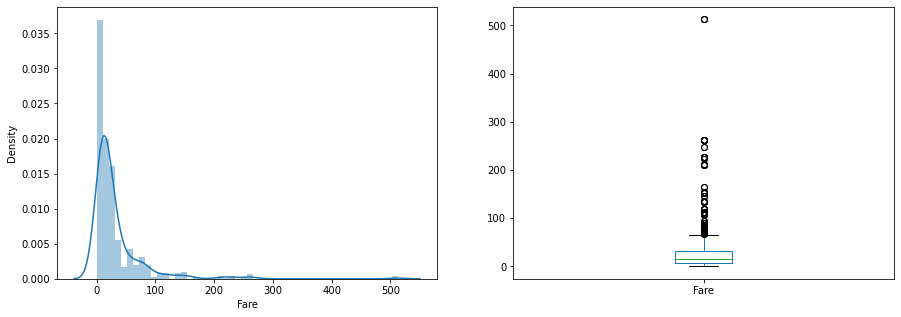

In [20]:
# Checking data distribution and outliers for all numeric variables
plt.figure(2)
plt.subplot(121)
sns.distplot(data['Fare'])
plt.subplot(122)
data['Fare'].plot.box(figsize=(15,5))

In [21]:
# Compare Survival rate across Age, SibSp, Parch and Fare

pd.pivot_table(data,index='Survived',values=['Age', 'SibSp', 'Parch', 'Fare'])

,Age,Fare,Parch,SibSp
Survived,,,,
0,30.626179,22.117887,0.329690,0.553734
1,28.343690,48.395408,0.464912,0.473684


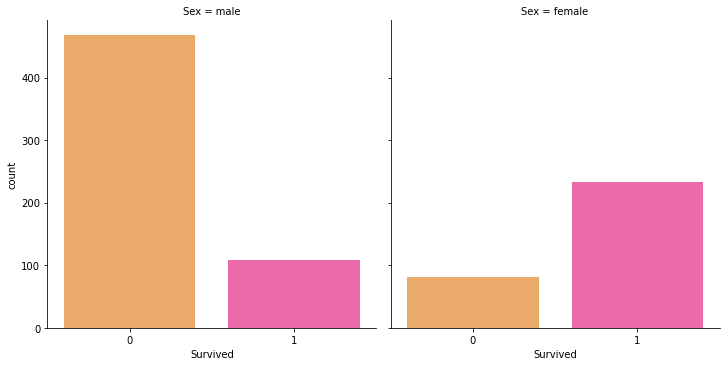

In [22]:
# Exploring categoric variables
#Pclass', 'Sex', 'Ticket', 'Cabin', 'Embarked'
# Checking survived and Sex 
sns.catplot(x='Survived',col='Sex',data=data,kind='count',palette='spring_r')

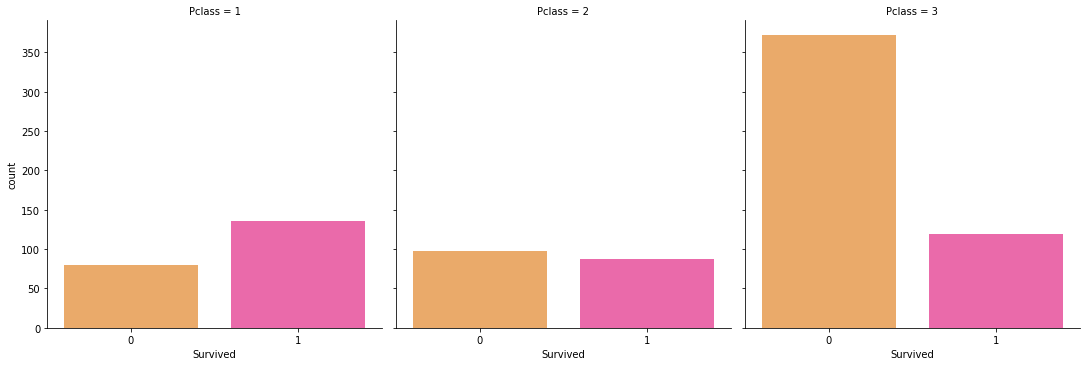

In [23]:
# Checking survived and Pclass
sns.catplot(x='Survived',col='Pclass',data=data,kind='count',palette='spring_r')

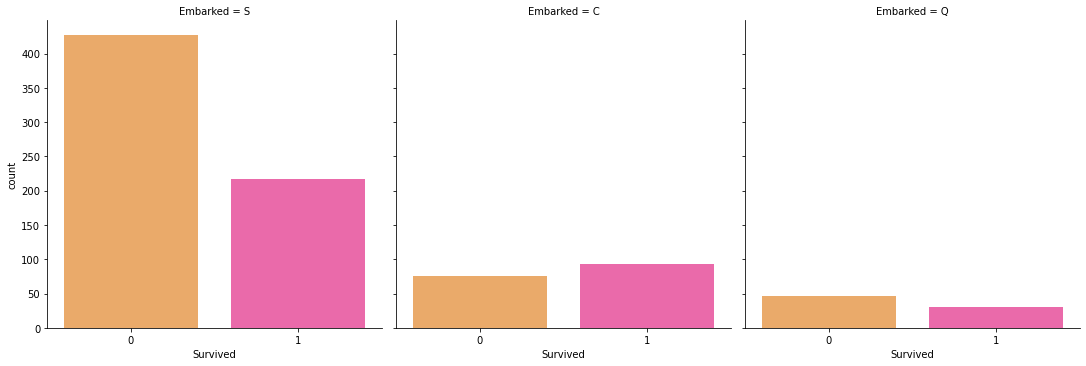

In [24]:
# Checking survived and Embarked
sns.catplot(x='Survived',col='Embarked',data=data,kind='count',palette='spring_r')

In [25]:
# Comparing survival and each of these categorical variables 
print(pd.pivot_table(data, index = 'Survived', columns = 'Pclass', values = 'Ticket' ,aggfunc ='count'))
print()
print(pd.pivot_table(data, index = 'Survived', columns = 'Sex', values = 'Ticket' ,aggfunc ='count'))
print()
print(pd.pivot_table(data, index = 'Survived', columns = 'Embarked', values = 'Ticket' ,aggfunc ='count'))

Pclass      1   2    3
Survived              
0          80  97  372
1         136  87  119

Sex       female  male
Survived              
0             81   468
1            233   109

Embarked   C   Q    S
Survived             
0         75  47  427
1         93  30  217


In [26]:
# Checking survived and Ticket
plot=plt.figure(figsize=(10,30))
# sns.barplot(x='Survived',y='Ticket',data=data)

<Figure size 720x2160 with 0 Axes>

<AxesSubplot:xlabel='Survived', ylabel='Cabin'>

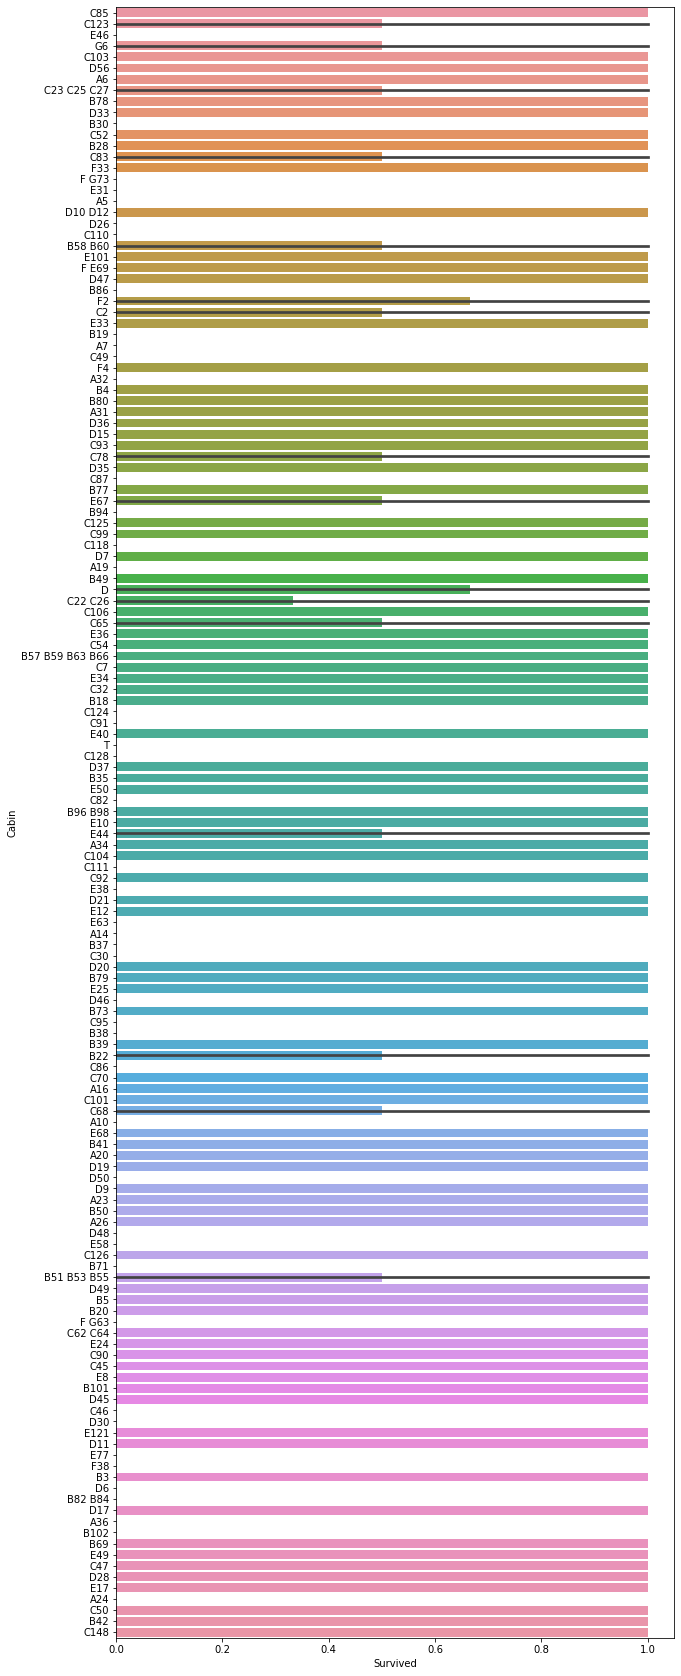

In [27]:
# Checking survived and Cabin
plot=plt.figure(figsize=(10,30))
sns.barplot(x='Survived',y='Cabin',data=data)

### Feature Engineering

In [28]:
# Checking Cabin values
# for i in data['Cabin']:
    #print(i)

In [29]:
# Simplify Cabins and Tickets variable since the graphs are very messy.
# Creating Cabin categories, identifying and classifying rows with multiple cabins, null values will be classified as '0'.
data['Cabin']
data['Cabin_mc']=data['Cabin'].apply(lambda x:0 if pd.isna(x) else len(x.split(" ")))

# Checking value counts
data['Cabin_mc'].value_counts()

0    687
1    180
2     16
3      6
4      2
Name: Cabin_mc, dtype: int64

In [30]:
data['Ticket']

0             A/5 21171
1              PC 17599
2      STON/O2. 3101282
3                113803
4                373450
             ...       
886              211536
887              112053
888          W./C. 6607
889              111369
890              370376
Name: Ticket, Length: 891, dtype: object

In [31]:
# Checking the ticket values in relation to survived and cabin categories.
pd.pivot_table(data,index='Survived',columns='Cabin_mc',values='Ticket',aggfunc='count')

Cabin_mc,0,1,2,3,4
Survived,,,,,
0,481.0,58.0,7.0,3.0,NaN
1,206.0,122.0,9.0,3.0,2.0


In [32]:
# Creating categories based on the cabin letter, null values will be the category "n" (null).
data['Cabin_letter']=data.Cabin.apply(lambda x: str(x)[0])
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Cabin_mc,Cabin_letter
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,n
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,n
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,C
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,n
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,0,n
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,1,B
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,0,n
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,1,C


In [33]:
# Checking survival rate by Cabin
data['Cabin_letter'].value_counts()
pd.pivot_table(data,index='Survived',columns='Cabin_letter',values='Name',aggfunc='count')

Cabin_letter,A,B,C,D,E,F,G,T,n
Survived,,,,,,,,,
0,8.0,12.0,24.0,8.0,8.0,5.0,2.0,1.0,481.0
1,7.0,35.0,35.0,25.0,24.0,8.0,2.0,NaN,206.0


The data shows that more people survived in Cabins B and C.

<AxesSubplot:xlabel='Survived', ylabel='Cabin_letter'>

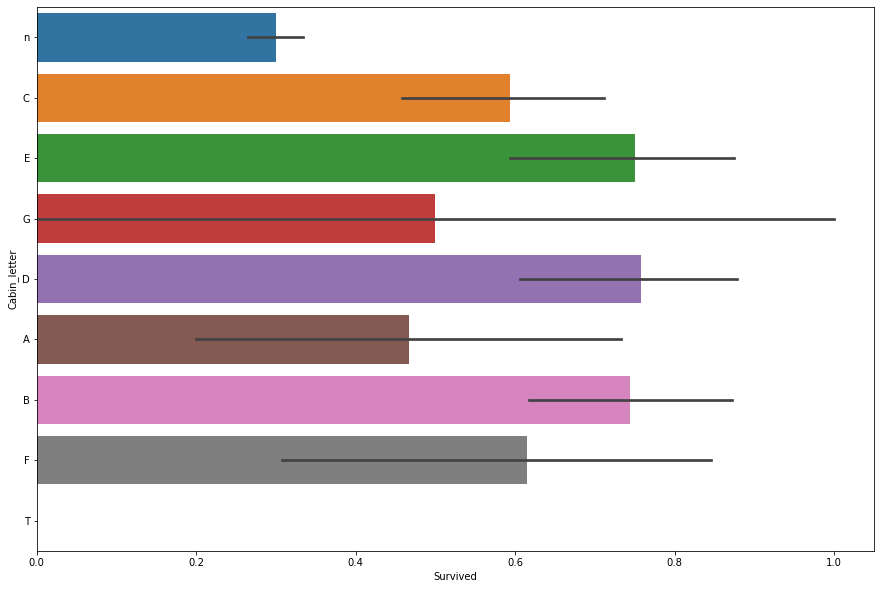

In [34]:
# Checking survived and Cabin by categories
plot=plt.figure(figsize=(15,10))
sns.barplot(x='Survived',y='Cabin_letter',data=data)

In [35]:
# Checking ticket values
# numeric vs non numeric
data['tickets_num']=data.Ticket.apply(lambda x:1 if x.isnumeric() else 0)
data['tickets_l']=data.Ticket.apply(lambda x:"".join(x.split(' ')[:-1]).replace(".","").replace("/","").lower() if len(x.split(" ")[:-1])>0 else 0)

In [36]:
data['tickets_num'].value_counts()

1    661
0    230
Name: tickets_num, dtype: int64

In [37]:
# Checking all non numeric ticket values after conversion
pd.set_option("max_rows",None)
data['tickets_l'].value_counts()

0            665
pc            60
ca            41
a5            21
stono2        18
sotonoq       15
scparis       11
wc            10
a4             7
soc            6
c              5
fcc            5
wep            3
sopp           3
pp             3
sotono2        2
scah           2
swpp           2
ppp            2
fa             1
sp             1
casoton        1
sc             1
fc             1
scahbasle      1
sca4           1
as             1
scow           1
sop            1
Name: tickets_l, dtype: int64

In [38]:
# Checking the difference between numeric and non-numeric tickets in survival rate
pd.pivot_table(data,index='Survived',columns='tickets_num',values='Ticket',aggfunc='count')

tickets_num,0,1
Survived,,
0,142,407
1,88,254


Most of the tickets are numeric.

In [39]:
# Checking survival rate across different ticket types
pd.pivot_table(data,index='Survived',columns='tickets_l',values='Ticket',aggfunc='count')

tickets_l,0,a4,a5,as,c,ca,casoton,fa,fc,fcc,...,soc,sop,sopp,sotono2,sotonoq,sp,stono2,swpp,wc,wep
Survived,,,,,,,,,,,,,,,,,,,,,
0,410.0,7.0,19.0,1.0,3.0,27.0,1.0,1.0,1.0,1.0,...,5.0,1.0,3.0,2.0,13.0,1.0,10.0,NaN,9.0,2.0
1,255.0,NaN,2.0,NaN,2.0,14.0,NaN,NaN,NaN,4.0,...,1.0,NaN,NaN,NaN,2.0,NaN,8.0,2.0,1.0,1.0


In [40]:
# Checking person's titles

data['Name'].head(50)

0                               Braund, Mr. Owen Harris
1     Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                Heikkinen, Miss. Laina
3          Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                              Allen, Mr. William Henry
5                                      Moran, Mr. James
6                               McCarthy, Mr. Timothy J
7                        Palsson, Master. Gosta Leonard
8     Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)
9                   Nasser, Mrs. Nicholas (Adele Achem)
10                      Sandstrom, Miss. Marguerite Rut
11                             Bonnell, Miss. Elizabeth
12                       Saundercock, Mr. William Henry
13                          Andersson, Mr. Anders Johan
14                 Vestrom, Miss. Hulda Amanda Adolfina
15                     Hewlett, Mrs. (Mary D Kingcome) 
16                                 Rice, Master. Eugene
17                         Williams, Mr. Charles

In [41]:
# Identifying common person's titles in the dataset

data['n_title']=data['Name'].apply(lambda x: x.split(',')[1].split('.')[0].strip())
data['n_title'].value_counts()

Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Mlle              2
Major             2
Col               2
Jonkheer          1
Sir               1
Ms                1
the Countess      1
Don               1
Capt              1
Lady              1
Mme               1
Name: n_title, dtype: int64

In [42]:
# data[data['Age']!=np.floor(data['Age'])]

### Correlation

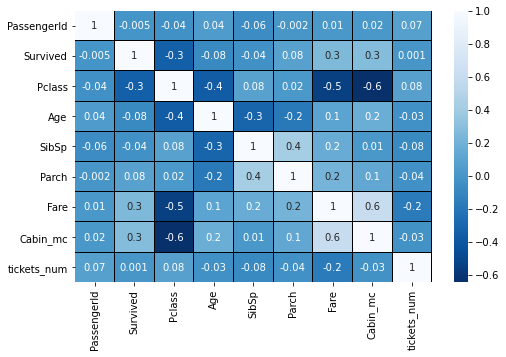

In [43]:
# Visualizing the correlation matrix by plotting heatmap
plt.figure(figsize=(8,5))
sns.heatmap(data.corr(),linewidths=0.1,fmt=".1g",linecolor="black",annot=True,cmap="Blues_r")
plt.yticks(rotation=0);
plt.show()

In [44]:
data.corr()['Survived'].sort_values()

Pclass        -0.338481
Age           -0.077221
SibSp         -0.035322
PassengerId   -0.005007
tickets_num    0.001492
Parch          0.081629
Fare           0.257307
Cabin_mc       0.277053
Survived       1.000000
Name: Survived, dtype: float64

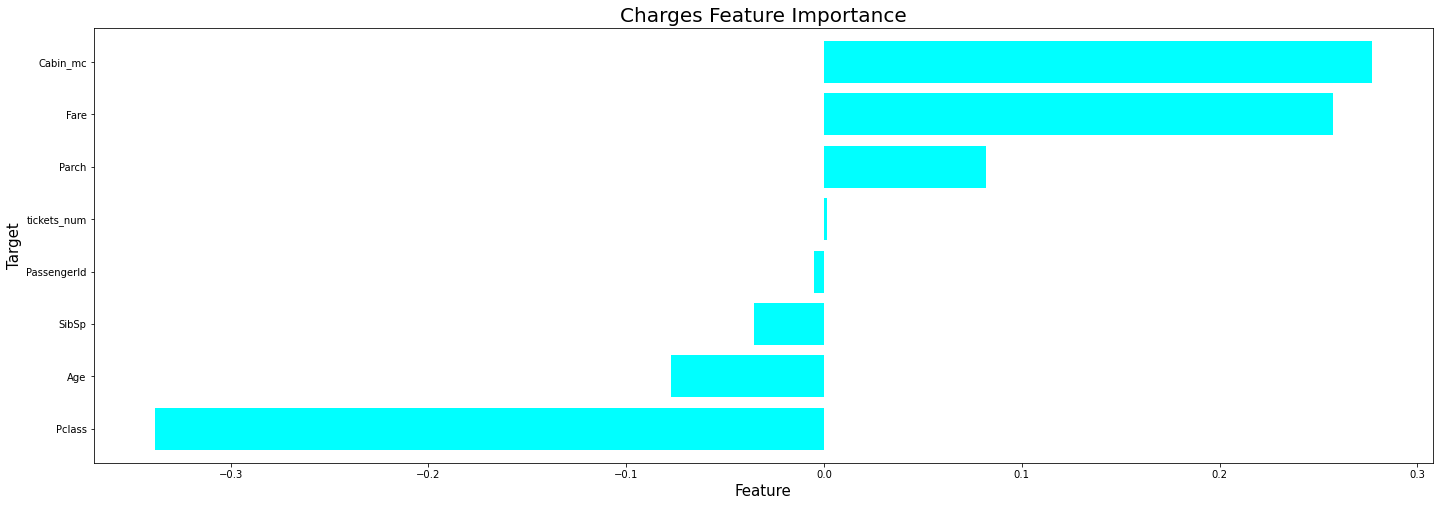

In [45]:
# Visualize correlations of charges by feature importance

plt.figure(figsize=(24,8))
data.corr()['Survived'].sort_values().drop(['Survived']).plot(kind='barh',color='aqua',width=0.8)
plt.xlabel('Feature',fontsize=15)
plt.ylabel('Target',fontsize=15)
plt.title('Charges Feature Importance',fontsize=20)
plt.show()

By looking at the averages, there is an indication that younger people, also people paying more had more probability of survival. If you are on board with your parents there is a higher chance of surviving than when you are aboard with a sibling.

### Data Preprocessing

In [46]:
# Checking for skewness
data.skew()

PassengerId    0.000000
Survived       0.478523
Pclass        -0.630548
Age            0.389108
SibSp          3.695352
Parch          2.749117
Fare           4.787317
Cabin_mc       2.526877
tickets_num   -1.107248
dtype: float64

In [47]:
# Removing skewness using log method
data['norm_fare']=np.log(data.Fare+1)

# Note: Remove skewness when the variable has a bad correlation with target variable, not when the correlation is good.

In [48]:
#data['SibSp']=np.log(data.SibSp+1)

<AxesSubplot:xlabel='norm_fare', ylabel='Density'>

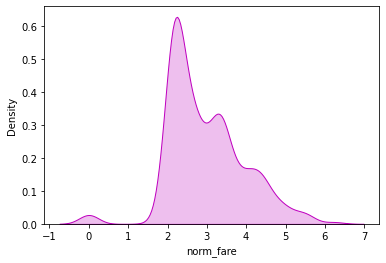

In [49]:
# Let's visualize how the data has been distributed in Fare after removing skewness.
sns.distplot(data['norm_fare'],color="m",kde_kws={"shade":True},hist=False)

In [50]:
# Let's visualize how the data has been distributed in SibSp after removing skewness.
# sns.distplot(data['SibSp'],color="m",kde_kws={"shade":True},hist=False)

In [68]:
# Imputing null values for continuous data using IterativeImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

impute_it=IterativeImputer()
X1=impute_it.fit_transform(numerical_data)

In [69]:
dataX=pd.DataFrame(X1,columns=['Age','SibSp','Parch','Fare'])
print(dataX)

           Age  SibSp  Parch      Fare
0    22.000000    1.0    0.0    7.2500
1    38.000000    1.0    0.0   71.2833
2    26.000000    0.0    0.0    7.9250
3    35.000000    1.0    0.0   53.1000
4    35.000000    0.0    0.0    8.0500
5    31.593748    0.0    0.0    8.4583
6    54.000000    0.0    0.0   51.8625
7     2.000000    3.0    1.0   21.0750
8    27.000000    0.0    2.0   11.1333
9    14.000000    1.0    0.0   30.0708
10    4.000000    1.0    1.0   16.7000
11   58.000000    0.0    0.0   26.5500
12   20.000000    0.0    0.0    8.0500
13   39.000000    1.0    5.0   31.2750
14   14.000000    0.0    0.0    7.8542
15   55.000000    0.0    0.0   16.0000
16    2.000000    4.0    1.0   29.1250
17   31.789372    0.0    0.0   13.0000
18   31.000000    1.0    0.0   18.0000
19   31.540626    0.0    0.0    7.2250
20   35.000000    0.0    0.0   26.0000
21   34.000000    0.0    0.0   13.0000
22   15.000000    0.0    0.0    8.0292
23   28.000000    0.0    0.0   35.5000
24    8.000000    3.0    

In [70]:
# Replacing missing values in main dataset and checking again missing values
data['Age']=dataX['Age']
data.isnull().sum()

PassengerId       0
Survived          0
Pclass            0
Name              0
Sex               0
Age               0
SibSp             0
Parch             0
Ticket            0
Fare              0
Cabin           687
Embarked          0
Cabin_mc          0
Cabin_letter      0
tickets_num       0
tickets_l         0
n_title           0
norm_fare         0
dtype: int64

In [71]:
# Drop null embarked rows, given that they are only 2 instances.

data.dropna(subset=['Embarked'],inplace=True)

In [72]:
# Converting Pclass to category for pd.get_dummies()
data.Pclass=data.Pclass.astype(str)

In [73]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Cabin_mc',
       'Cabin_letter', 'tickets_num', 'tickets_l', 'n_title', 'norm_fare'],
      dtype='object')

In [77]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   889 non-null    int64  
 1   Survived      889 non-null    int64  
 2   Pclass        889 non-null    float64
 3   Name          889 non-null    float64
 4   Sex           889 non-null    float64
 5   Age           889 non-null    float64
 6   SibSp         889 non-null    int64  
 7   Parch         889 non-null    int64  
 8   Ticket        889 non-null    float64
 9   Fare          889 non-null    float64
 10  Cabin         202 non-null    object 
 11  Embarked      889 non-null    object 
 12  Cabin_mc      889 non-null    int64  
 13  Cabin_letter  889 non-null    object 
 14  tickets_num   889 non-null    int64  
 15  tickets_l     889 non-null    object 
 16  n_title       889 non-null    object 
 17  norm_fare     889 non-null    float64
dtypes: float64(7), int64(6), objec

In [57]:
# Creating dummy variables from categories

all_dumies=pd.get_dummies(data[['Pclass','Sex','Age','SibSp',
       'Parch','norm_fare','tickets_num','Embarked', 'Cabin_letter','Cabin_mc','n_title']])

In [58]:
all_dumies

,Age,SibSp,Parch,norm_fare,tickets_num,Cabin_mc,Pclass_1,Pclass_2,Pclass_3,Sex_female,...,n_title_Master,n_title_Miss,n_title_Mlle,n_title_Mme,n_title_Mr,n_title_Mrs,n_title_Ms,n_title_Rev,n_title_Sir,n_title_the Countess
0,22.000000,1,0,2.110213,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
1,38.000000,1,0,4.280593,0,1,1,0,0,1,...,0,0,0,0,0,1,0,0,0,0
2,26.000000,0,0,2.188856,0,0,0,0,1,1,...,0,1,0,0,0,0,0,0,0,0
3,35.000000,1,0,3.990834,1,1,1,0,0,1,...,0,0,0,0,0,1,0,0,0,0
4,35.000000,0,0,2.202765,1,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
5,31.593748,0,0,2.246893,1,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
6,54.000000,0,0,3.967694,1,1,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
7,2.000000,3,1,3.094446,1,0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0
8,27.000000,0,2,2.495954,1,0,0,0,1,1,...,0,0,0,0,0,1,0,0,0,0
9,14.000000,1,0,3.436268,1,0,0,1,0,1,...,0,0,0,0,0,1,0,0,0,0


In [59]:
# Separating features and label

#x=all_dumies
#y=data['Survived']

#### Feature Scaling using Standard Scalarization

In [60]:
# Scaling numeric data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
all_dummies_scaled = x.copy()
all_dummies_scaled[['Age','SibSp','Parch','norm_fare']]= scaler.fit_transform(all_dummies_scaled[['Age','SibSp','Parch','norm_fare']])
all_dummies_scaled

,Age,SibSp,Parch,norm_fare,tickets_num,Cabin_mc,Pclass_1,Pclass_2,Pclass_3,Sex_female,...,n_title_Master,n_title_Miss,n_title_Mlle,n_title_Mme,n_title_Mr,n_title_Mrs,n_title_Ms,n_title_Rev,n_title_Sir,n_title_the Countess
0,-0.567557,0.431350,-0.474326,-0.877591,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
1,0.628216,0.431350,-0.474326,1.366380,0,1,1,0,0,1,...,0,0,0,0,0,1,0,0,0,0
2,-0.268614,-0.475199,-0.474326,-0.796281,0,0,0,0,1,1,...,0,1,0,0,0,0,0,0,0,0
3,0.404008,0.431350,-0.474326,1.066796,1,1,1,0,0,1,...,0,0,0,0,0,1,0,0,0,0
4,0.404008,-0.475199,-0.474326,-0.781901,1,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
5,0.149439,-0.475199,-0.474326,-0.736277,1,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
6,1.823989,-0.475199,-0.474326,1.042871,1,1,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
7,-2.062274,2.244449,0.765897,0.140014,1,0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0
8,-0.193878,-0.475199,2.006119,-0.478771,1,0,0,0,1,1,...,0,0,0,0,0,1,0,0,0,0
9,-1.165444,0.431350,-0.474326,0.493427,1,0,0,1,0,1,...,0,0,0,0,0,1,0,0,0,0


In [126]:
# Separating features and label

x=all_dummies_scaled
#[['Age','SibSp', 'Parch', 'norm_fare', 'tickets_num', 'Cabin_mc',
       #'Pclass_1', 'Pclass_2', 'Pclass_3', 'Sex_female', 'Sex_male',
       #'Embarked_C', 'Embarked_Q', 'Embarked_S', 'Cabin_letter_A',
       #'Cabin_letter_B', 'Cabin_letter_C', 'Cabin_letter_D', 'Cabin_letter_E',
       #'Cabin_letter_F', 'Cabin_letter_G', 'Cabin_letter_T', 'Cabin_letter_n']]

y=data['Survived']

In [127]:
x.columns

Index(['Age', 'SibSp', 'Parch', 'norm_fare', 'tickets_num', 'Cabin_mc',
       'Pclass_1', 'Pclass_2', 'Pclass_3', 'Sex_female', 'Sex_male',
       'Embarked_C', 'Embarked_Q', 'Embarked_S', 'Cabin_letter_A',
       'Cabin_letter_B', 'Cabin_letter_C', 'Cabin_letter_D', 'Cabin_letter_E',
       'Cabin_letter_F', 'Cabin_letter_G', 'Cabin_letter_T', 'Cabin_letter_n',
       'n_title_Capt', 'n_title_Col', 'n_title_Don', 'n_title_Dr',
       'n_title_Jonkheer', 'n_title_Lady', 'n_title_Major', 'n_title_Master',
       'n_title_Miss', 'n_title_Mlle', 'n_title_Mme', 'n_title_Mr',
       'n_title_Mrs', 'n_title_Ms', 'n_title_Rev', 'n_title_Sir',
       'n_title_the Countess'],
      dtype='object')

### Checking Variance Inflation Factor

In [128]:
# Finding the Variance Inflation Factor in each scaled column i.e, x.shape[1] (1/(1-R2))

from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()

vif["VIF values"]=[variance_inflation_factor(x.values,i)
    for i in range(len(x.columns))]
vif["Features"]=x.columns
vif

,VIF values,Features
0,1.775564,Age
1,1.679007,SibSp
2,1.551111,Parch
3,3.250700,norm_fare
4,1.102553,tickets_num
5,6.038807,Cabin_mc
6,inf,Pclass_1
7,inf,Pclass_2
8,inf,Pclass_3
9,inf,Sex_female


### Modelling

In [129]:
# Finding the best random state

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
maxAccu=0
maxRS=0

for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=i)
    RFR=RandomForestClassifier()
    RFR.fit(x_train,y_train)
    pred=RFR.predict(x_test)
    acc=accuracy_score(y_test,pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best accuracy is ",maxAccu, "at random_state",maxRS)

Best accuracy is  0.8539325842696629 at random_state 11


In [130]:
# Creating train test split

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=maxRS)

## Model Building

#### Classification Algorithms

In [131]:
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.metrics import classification_report,confusion_matrix,roc_curve,accuracy_score
from sklearn.model_selection import cross_val_score

In [132]:
# Checking the accuracy for RandomForestClassifier

RFC=RandomForestClassifier()
RFC.fit(x_train,y_train)
predRFC=RFC.predict(x_test)
acc_RFC=accuracy_score(y_test,predRFC)
print(acc_RFC)
print(confusion_matrix(y_test,predRFC))
print(classification_report(y_test,predRFC))

0.846441947565543
[[138  23]
 [ 18  88]]
              precision    recall  f1-score   support

           0       0.88      0.86      0.87       161
           1       0.79      0.83      0.81       106

    accuracy                           0.85       267
   macro avg       0.84      0.84      0.84       267
weighted avg       0.85      0.85      0.85       267



In [133]:
# Checking the accuracy for Logistic Regression

LR=LogisticRegression()
LR.fit(x_train,y_train)
predLR=LR.predict(x_test)
acc_LR=accuracy_score(y_test,predLR)
print(acc_LR)
print(confusion_matrix(y_test,predLR))
print(classification_report(y_test,predLR))

0.8651685393258427
[[143  18]
 [ 18  88]]
              precision    recall  f1-score   support

           0       0.89      0.89      0.89       161
           1       0.83      0.83      0.83       106

    accuracy                           0.87       267
   macro avg       0.86      0.86      0.86       267
weighted avg       0.87      0.87      0.87       267



In [134]:
# Checking the accuracy for Support Vector Machine Classifier

svc=SVC()
svc.fit(x_train,y_train)
predsvc=svc.predict(x_test)
acc_SVC=accuracy_score(y_test,predsvc)
print(acc_SVC)
print(confusion_matrix(y_test,predsvc))
print(classification_report(y_test,predsvc))

0.8764044943820225
[[147  14]
 [ 19  87]]
              precision    recall  f1-score   support

           0       0.89      0.91      0.90       161
           1       0.86      0.82      0.84       106

    accuracy                           0.88       267
   macro avg       0.87      0.87      0.87       267
weighted avg       0.88      0.88      0.88       267



In [135]:
# Checking the accuracy for Gradient Boosting Classifier

GB=GradientBoostingClassifier()
GB.fit(x_train,y_train)
predGB=GB.predict(x_test)
acc_GB=accuracy_score(y_test,predGB)
print(acc_GB)
print(confusion_matrix(y_test,predGB))
print(classification_report(y_test,predGB))

0.8689138576779026
[[146  15]
 [ 20  86]]
              precision    recall  f1-score   support

           0       0.88      0.91      0.89       161
           1       0.85      0.81      0.83       106

    accuracy                           0.87       267
   macro avg       0.87      0.86      0.86       267
weighted avg       0.87      0.87      0.87       267



In [136]:
# Checking the accuracy for AdaBoost Classifier

ABC=AdaBoostClassifier()
ABC.fit(x_train,y_train)
predABC=ABC.predict(x_test)
acc_ABC=accuracy_score(y_test,predABC)
print(acc_ABC)
print(confusion_matrix(y_test,predABC))
print(classification_report(y_test,predABC))

0.8426966292134831
[[139  22]
 [ 20  86]]
              precision    recall  f1-score   support

           0       0.87      0.86      0.87       161
           1       0.80      0.81      0.80       106

    accuracy                           0.84       267
   macro avg       0.84      0.84      0.84       267
weighted avg       0.84      0.84      0.84       267



In [137]:
# Checking the accuracy for Bagging Classifier

BC=BaggingClassifier()
BC.fit(x_train,y_train)
predBC=BC.predict(x_test)
acc_BC=accuracy_score(y_test,predBC)
print(acc_BC)
print(confusion_matrix(y_test,predBC))
print(classification_report(y_test,predBC))

0.8426966292134831
[[139  22]
 [ 20  86]]
              precision    recall  f1-score   support

           0       0.87      0.86      0.87       161
           1       0.80      0.81      0.80       106

    accuracy                           0.84       267
   macro avg       0.84      0.84      0.84       267
weighted avg       0.84      0.84      0.84       267



In [149]:
# Checking the accuracy for ExtraTreesClassifier

ET=ExtraTreesClassifier()
ET.fit(x_train,y_train)
predET=ET.predict(x_test)
acc_ET=accuracy_score(y_test,predET)
print(acc_ET)
print(confusion_matrix(y_test,predET))
print(classification_report(y_test,predET))

0.8352059925093633
[[137  24]
 [ 20  86]]
              precision    recall  f1-score   support

           0       0.87      0.85      0.86       161
           1       0.78      0.81      0.80       106

    accuracy                           0.84       267
   macro avg       0.83      0.83      0.83       267
weighted avg       0.84      0.84      0.84       267



In [150]:
# Checking all algorithm results

results_alg=pd.DataFrame({'Model':['RandomForestClassifier','Logistic Regression', 'Support Vector Machine Classifier(SVC)', 'Gradient Boosting Classifier', 'AdaBoost Classifier', 'Bagging Classifier', 'ExtraTreesClassifier'],'Accuracy':[acc_RFC,acc_LR,acc_SVC,acc_GB,acc_ABC,acc_BC,acc_ET]})
results_alg.index+=1
results_alg

,Model,Accuracy
1,RandomForestClassifier,0.846442
2,Logistic Regression,0.865169
3,Support Vector Machine Classifier(SVC),0.876404
4,Gradient Boosting Classifier,0.868914
5,AdaBoost Classifier,0.842697
6,Bagging Classifier,0.842697
7,ExtraTreesClassifier,0.835206


Support Vector Machine Classifier(SVC) has the highest accuracy score.

#### Cross Validation Score

In [151]:
from sklearn.model_selection import cross_val_score

In [152]:
# Checking cv score for Random Forest Classifier
score=cross_val_score(RFC,x,y)
print(score)
print(score.mean())
diff_RFC=accuracy_score(y_test,predRFC)-score.mean()
print("Difference between Accuracy Score and Cross Validation Score is",diff_RFC)

[0.82022472 0.79775281 0.84269663 0.75280899 0.83050847]
0.8087983241287373
Difference between Accuracy Score and Cross Validation Score is 0.03764362343680572


In [153]:
# Checking cv score for Logistic Regression
score=cross_val_score(LR,x,y)
print(score)
print(score.mean())
diff_LR=accuracy_score(y_test,predLR)-score.mean()
print("Difference between Accuracy Score and Cross Validation Score is",diff_LR)

[0.82022472 0.81460674 0.80898876 0.82022472 0.85310734]
0.8234304576905986
Difference between Accuracy Score and Cross Validation Score is 0.04173808163524406


In [154]:
# Checking cv score for Gradient Boosting Classifier
score=cross_val_score(GB,x,y)
print(score)
print(score.mean())
diff_GB=accuracy_score(y_test,predGB)-score.mean()
print("Difference between Accuracy Score and Cross Validation Score is",diff_GB)

[0.81460674 0.80337079 0.85955056 0.80898876 0.85310734]
0.8279248397130704
Difference between Accuracy Score and Cross Validation Score is 0.04098901796483223


In [155]:
# Checking cv score for Support Vector Machine Classifier
score=cross_val_score(svc,x,y)
print(score)
print(score.mean())
diff_SVC=accuracy_score(y_test,predsvc)-score.mean()
print("Difference between Accuracy Score and Cross Validation Score is",diff_SVC)

[0.84831461 0.82022472 0.8258427  0.80337079 0.85875706]
0.8313019742271314
Difference between Accuracy Score and Cross Validation Score is 0.045102520154891135


In [156]:
# Checking cv score for AdaBoosting Classifier
score=cross_val_score(ABC,x,y)
print(score)
print(score.mean())
diff_ABC=accuracy_score(y_test,predABC)-score.mean()
print("Difference between Accuracy Score and Cross Validation Score is",diff_ABC)

[0.79213483 0.80898876 0.79213483 0.84269663 0.85310734]
0.8178124801625086
Difference between Accuracy Score and Cross Validation Score is 0.02488414905097447


In [157]:
# Checking cv score for Bagging Classifier
score=cross_val_score(BC,x,y)
print(score)
print(score.mean())
diff_BC=accuracy_score(y_test,predBC)-score.mean()
print("Difference between Accuracy Score and Cross Validation Score is",diff_BC)

[0.80337079 0.79213483 0.84269663 0.79775281 0.84745763]
0.8166825366596839
Difference between Accuracy Score and Cross Validation Score is 0.026014092553799162


In [158]:
# Checking cv score for ExtraTrees Classifier
score=cross_val_score(ET,x,y)
print(score)
print(score.mean())
diff_ET=accuracy_score(y_test,predET)-score.mean()
print("Difference between Accuracy Score and Cross Validation Score is",diff_ET)

[0.80898876 0.7752809  0.84269663 0.74719101 0.81355932]
0.7975433250809371
Difference between Accuracy Score and Cross Validation Score is 0.03766266742842628


In [159]:
# Checking for the least difference between Accuracy Score and Cross Validation Score per algorithm

diff=pd.DataFrame({'Model':['RandomForestClassifier','Logistic Regression', 'Support Vector Machine Classifier(SVC)', 'Gradient Boosting Classifier', 'AdaBoost Classifier', 'Bagging Classifier', 'ExtraTreesClassifier'],'Difference':[diff_RFC,diff_LR,diff_SVC,diff_GB,diff_ABC,diff_BC,diff_ET]})
diff.index+=1
diff

,Model,Difference
1,RandomForestClassifier,0.037644
2,Logistic Regression,0.041738
3,Support Vector Machine Classifier(SVC),0.045103
4,Gradient Boosting Classifier,0.040989
5,AdaBoost Classifier,0.024884
6,Bagging Classifier,0.026014
7,ExtraTreesClassifier,0.037663


AdaBoost Classifier is our best model as the difference between Accuracy Score and Cross Validation is least.

### Hyperparameter Tuning

In [116]:
# To increase the performance of the model
# GradientBoostingClassifier

from sklearn.model_selection import GridSearchCV
from scipy.stats import uniform as sp_randFloat
from scipy.stats import randint as sp_randInt

parameters={'learning_rate':sp_randFloat(),
           'subsample':sp_randFloat(),
           'n_estimators':sp_randInt(100,1000),
           'max_depth':sp_randInt(4,10)}

In [162]:
from sklearn.model_selection import GridSearchCV
from scipy.stats import uniform as sp_randFloat
from scipy.stats import randint as sp_randInt

parameters={'n_estimators':[10,50,100,500],
           'learning_rate':[0.0001,0.001,0.01,0.1,1],
           'algorithm':['SAMME','SAMME.R']}

In [160]:
#GradientBoostingClassifier().get_params().keys()
#AdaBoostClassifier().get_params().keys()

dict_keys(['algorithm', 'base_estimator', 'learning_rate', 'n_estimators', 'random_state'])

In [164]:
GSV=GridSearchCV(estimator=AdaBoostClassifier(),param_grid=parameters,cv=5,scoring='accuracy')

In [165]:
GSV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=AdaBoostClassifier(),
             param_grid={'algorithm': ['SAMME', 'SAMME.R'],
                         'learning_rate': [0.0001, 0.001, 0.01, 0.1, 1],
                         'n_estimators': [10, 50, 100, 500]},
             scoring='accuracy')

In [166]:
GSV.best_params_

{'algorithm': 'SAMME', 'learning_rate': 1, 'n_estimators': 50}

In [168]:
Final_model=AdaBoostClassifier(algorithm='SAMME', learning_rate= 1, n_estimators=50)
Final_model.fit(x_train,y_train)
pred=Final_model.predict(x_test)
acc=accuracy_score(y_test,pred)
print(acc*100)

85.0187265917603


### Plotting ROC and compare AUC for the best model

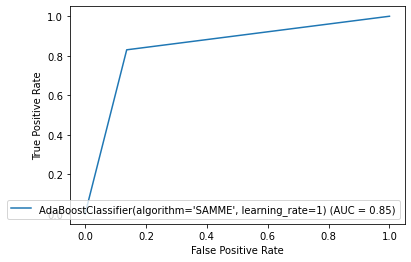

In [169]:
from sklearn import metrics
fpr, tpr, thresholds = metrics.roc_curve(y_test,pred) #fpr=false positive rate, tpr= true positive rate
roc_auc=metrics.auc(fpr,tpr)
display=metrics.RocCurveDisplay(fpr=fpr,tpr=tpr,roc_auc=roc_auc,estimator_name=Final_model)
display.plot()

### Saving the model

In [170]:
# Saving the model using .pkl
import joblib
joblib.dump(Final_model,"Titanic_Analysis.pkl")

['Titanic_Analysis.pkl']

### Get Predictions

In [171]:
# Let's load the saved model and get the predictions

model=joblib.load("Titanic_Analysis.pkl")

# Prediction
prediction=model.predict(x_test)
prediction

array([1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0,
       0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 1, 1], dtype=int64)

In [172]:
# Checking if the model is giving the correct prediction

a=np.array(y_test)
df=pd.DataFrame()
df["Predicted"]=prediction
df["Original"]=a
df

,Predicted,Original
0,1,1
1,0,0
2,0,0
3,1,1
4,0,0
5,1,0
6,1,0
7,1,1
8,1,1
9,0,0
